In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
content = pd.read_csv(r'E:\03-NLP课程\课程作业\Week-3\train.csv')

In [6]:
content = content.dropna()
subcontent = content[content['Fare']<400]

In [7]:
age = subcontent['Age']
fare = subcontent['Fare']

In [8]:
# plt.scatter(age,fare)

In [9]:
def func(age, k, w, b): return k * age**2 + w*age + b

In [10]:
def loss(y, yhat):
    return np.mean(np.square(y-yhat))

# Random Choice

In [96]:
min_error_rate = float('inf')
loop_times = 20000
losses=[]



best_k, best_w, best_b = k_hat, w_hat, b_hat

while loop_times>0:
    
    k_hat = random.random()*200-100  #-100~100之间的随机数
    w_hat = random.random()*200-100
    b_hat = random.random()*200-100
    #print(k_hat, w_hat, b_hat)
    
    estimated_fare = func(age, k_hat,w_hat, b_hat)
    error_rate = loss(fare, estimated_fare)
    
    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_k, best_w, best_b = k_hat, w_hat, b_hat
        losses.append(error_rate)
        #print(loop_times, error_rate)
        print('loop == {}'.format(loop_times))
        print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))
    
    loop_times -= 1

loop == 20000
f(age) = 46.64066634001409 * age + 48.417586053396775, with error rate: 8633457084.695347
loop == 19998
f(age) = -5.143876732148357 * age + 81.6868193916865, with error rate: 86304781.01537052
loop == 19988
f(age) = 0.2551279234190247 * age + 53.12830966178629, with error rate: 149199.11662768884
loop == 19983
f(age) = -0.3934242350213566 * age + 40.112600275806955, with error rate: 114190.70606820802
loop == 19302
f(age) = 0.3874821704159501 * age + -57.43299150514001, with error rate: 82375.41341661724
loop == 18689
f(age) = 0.43140242331489276 * age + 70.94100750129056, with error rate: 78640.63073185297
loop == 16668
f(age) = 0.3129813569420179 * age + -38.38185357828199, with error rate: 47066.874701481654
loop == 15991
f(age) = -0.18571272623685786 * age + -15.336261723919066, with error rate: 33651.14487470346


# Supervised Direction

In [85]:
min_error_rate = float('inf')
loop_times = 20000
losses=[]

change_directions = [
    (1,1,1),
    (-1,1,1),
    (1,-1,1),
    (1,1,-1),
    (-1,-1,1),
    (-1,1,-1),
    (1,-1,-1),
    (-1,-1,-1)
]

k_hat = random.random()*2-1  #-1~1之间的随机数
w_hat = random.random()*2-1
b_hat = random.random()*2-1

best_k, best_w, best_b = k_hat, w_hat, b_hat

best_direction = None

def step(): return random.random()*1

direction = random.choice(change_directions)

In [86]:
k_hat

0.6023204936804192

In [87]:
random.choice(change_directions)

(1, -1, -1)

In [88]:
while loop_times>0:
    k_delta_direction,w_delta_direction, b_delta_direction = direction
    
    k_delta = k_delta_direction * step()
    w_delta = w_delta_direction * step()
    b_delta = b_delta_direction * step()
    
    new_k = best_k + k_delta
    new_w = best_w + k_delta
    new_b = best_b + b_delta
    
    estimated_fare = func(age, new_k,new_w, new_b)
    error_rate = loss(fare, estimated_fare)
    
    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_k, best_w, best_b = new_k, new_w, new_b
        direction = (k_delta_direction, w_delta_direction, b_delta_direction)
        losses.append(error_rate)
        #print(loop_times, error_rate)
    else:
        direction = random.choice(list(set(change_directions)-{(k_delta_direction, w_delta_direction, b_delta_direction)}))
    loop_times -= 1

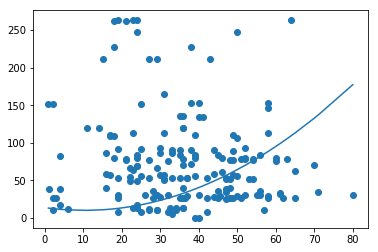

In [89]:
plt.scatter(age,fare)
plt.plot(age.sort_values(),func(age.sort_values(),best_k,best_w, best_b))

# Gradiene Descent

In [45]:
k_hat = random.random()*20-10  #-10~10之间的随机数
w_hat = random.random()*20-10
b_hat = random.random()*20-10

拟合公式为：$$ y = kx^2 + wx + b $$

In [46]:
def derivate_k(y,yhat,x):
    values = [- 2 * (y_i-yhat_i) * x_i**2 for y_i, yhat_i, x_i in zip(y,yhat,x)]
    return np.mean([i for i in values] )

def derivate_w(y,yhat,x):
    values = [- 2 * (y_i-yhat_i) * x_i for y_i, yhat_i, x_i in zip(y,yhat,x)]
    return np.mean([i for i in values])
    
def derivate_b(y,yhat):
    values = [- 2 * (y_i-yhat_i)  for y_i, yhat_i in zip(y,yhat)]
    return np.mean([i for i in values])

In [51]:
loop_times_2 = 10000
learning_rate = 0.0000001
losses=[]
while loop_times_2>0:
    k_delta = -1 * learning_rate * derivate_k(fare,func(age,k_hat,w_hat,b_hat), age)
    w_delta = -1 * learning_rate * derivate_w(fare,func(age,k_hat,w_hat,b_hat), age)
    b_delta = -1 * learning_rate * derivate_b(fare,func(age,k_hat,w_hat,b_hat))
    
    k_hat += k_delta
    w_hat += w_delta
    b_hat += b_delta
    print(k_hat, w_hat, b_hat)
    
    estimated_fares = func(age, k_hat, w_hat, b_hat)
    error_rate = loss(fare, estimated_fares)
    print(loop_times_2, error_rate)
    losses.append(error_rate)

    loop_times_2 -= 1

-0.002469789748948812 1.5198408082912682 2.668430332287258
10000 4930.188186618745
-0.002470963952026123 1.5199007340066253 2.668434482547743
9999 4930.15209008501
-0.0024721381281456833 1.5199606583456888 2.668438632736507
9998 4930.1159952073285
-0.0024733122773081097 1.5200205813084904 2.668442782853551
9997 4930.079901985629
-0.0024744863995140175 1.5200805028950617 2.6684469328988776
9996 4930.043810419833
-0.00247566049476403 1.5201404231054343 2.668451082872488
9995 4930.007720509859
-0.002476834563058766 1.5202003419396397 2.668455232774384
9994 4929.971632255643
-0.0024780086043988394 1.5202602593977095 2.668459382604567
9993 4929.935545657102
-0.002479182618784873 1.5203201754796751 2.6684635323630386
9992 4929.8994607141585
-0.0024803566062174816 1.5203800901855684 2.668467682049801
9991 4929.863377426741
-0.0024815305666972846 1.5204400035154206 2.668471831664855
9990 4929.827295794769
-0.002482704500224903 1.5204999154692636 2.6684759812082026
9989 4929.791215818172
-0.002

9873 4925.617151636095
-0.0026198688412437175 1.5275001241164452 2.6689609832413157
9872 4925.581264814528
-0.0026210395987515916 1.527559873922673 2.6689651243348576
9871 4925.545379639396
-0.002622210329380773 1.5276196223566438 2.6689692653568886
9870 4925.509496110617
-0.002623381033131882 1.527679369418389 2.66897340630741
9869 4925.473614228126
-0.0026245517100055324 1.5277391151079402 2.6689775471864245
9868 4925.437733991831
-0.002625722360002344 1.527798859425329 2.668981687993933
9867 4925.401855401672
-0.002626892983122934 1.5278586023705862 2.668985828729937
9866 4925.36597845756
-0.0026280635793679116 1.527918343943744 2.6689899693944383
9865 4925.330103159437
-0.0026292341487379033 1.5279780841448336 2.668994109987439
9864 4925.294229507212
-0.00263040469123352 1.5280378229738867 2.66899825050894
9863 4925.2583575008075
-0.0026315752068553815 1.5280975604309346 2.6690023909589433
9862 4925.222487140161
-0.0026327456956041044 1.5281572965160086 2.6690065313374505
9861 4925

-0.0027660054157172547 1.5349582249010192 2.6694780662461275
9747 4921.108353209049
-0.002767172818164263 1.5350178034189172 2.6694821984135197
9746 4921.072673243986
-0.0027683401938095654 1.5350773805684887 2.669486330509606
9745 4921.036994915862
-0.0027695075426537783 1.535136956349765 2.669490462534388
9744 4921.0013182246
-0.0027706748646975188 1.5351965307627773 2.6694945944878667
9743 4920.965643170128
-0.0027718421599413987 1.5352561038075572 2.6694987263700445
9742 4920.92996975237
-0.0027730094283860336 1.5353156754841362 2.669502858180923
9741 4920.894297971244
-0.002774176670032039 1.5353752457925454 2.6695069899205035
9740 4920.8586278266885
-0.002775343884880032 1.5354348147328163 2.669511121588788
9739 4920.82295931862
-0.002776511072930623 1.5354943823049805 2.6695152531857778
9738 4920.78729244696
-0.0027776782341844323 1.535553948509069 2.6695193847114744
9737 4920.751627211644
-0.0027788453686420694 1.5356135133451134 2.6695235161658797
9736 4920.715963612582
-0.002

-0.0029198710414310687 1.5428107704662564 2.6700228964423802
9615 4916.412722688477
-0.0029210349113650883 1.5428701686362343 2.670027019211506
9614 4916.3772581511
-0.0029221987545784613 1.5429295654420239 2.6700311419095413
9613 4916.341795240769
-0.002923362571071805 1.5429889608836564 2.6700352645364878
9612 4916.306333957419
-0.002924526360845726 1.5430483549611633 2.670039387092347
9611 4916.270874300973
-0.0029256901239008396 1.5431077476745758 2.670043509577121
9610 4916.235416271354
-0.0029268538602377618 1.543167139023925 2.670047631990811
9609 4916.199959868494
-0.0029280175698570988 1.5432265290092424 2.670051754333419
9608 4916.164505092306
-0.002929181252759469 1.5432859176305593 2.670055876604946
9607 4916.129051942721
-0.002930344908945486 1.5433453048879069 2.670059998805394
9606 4916.093600419669
-0.002931508538415759 1.5434046907813166 2.670064120934765
9605 4916.058150523072
-0.0029326721411709043 1.5434640753108197 2.67006824299306
9604 4916.022702252859
-0.0029338

9492 4912.06276979866
-0.003063987331616196 1.5501657499443149 2.670533578183909
9491 4912.027504829506
-0.0030651478928614786 1.5502249791934326 2.6705376921502495
9490 4911.992241478245
-0.003066308427462037 1.5502842070822382 2.6705418060457013
9489 4911.956979744802
-0.0030674689354184843 1.5503434336107629 2.6705459198702663
9488 4911.921719629107
-0.003068629416731427 1.5504026587790376 2.6705500336239463
9487 4911.886461131082
-0.0030697898714014795 1.5504618825870937 2.6705541473067425
9486 4911.851204250653
-0.003070950299429256 1.5505211050349625 2.6705582609186567
9485 4911.815948987744
-0.003072110700815362 1.5505803261226752 2.6705623744596907
9484 4911.78069534229
-0.003073271075560415 1.5506395458502626 2.670566487929846
9483 4911.745443314203
-0.0030744314236650183 1.5506987642177565 2.670570601329124
9482 4911.710192903417
-0.003075591745129789 1.5507579812251877 2.6705747146575267
9481 4911.67494410986
-0.0030767520399553375 1.5508171968725877 2.6705788279150555
9480 

-0.0032065366343113307 1.5574407506025787 2.6710390646594613
9368 4907.7022286865285
-0.0032076939228385523 1.557499812767273 2.671043169918712
9367 4907.667163771029
-0.0032088511847961428 1.557558873575489 2.671047275107274
9366 4907.632100464243
-0.003210008420184713 1.557617933027258 2.671051380225149
9365 4907.5970387660955
-0.0032111656290048766 1.557676991122611 2.6710554852723383
9364 4907.561978676514
-0.0032123228112572403 1.557736047861579 2.6710595902488437
9363 4907.526920195426
-0.003213479966942416 1.5577951032441932 2.671063695154667
9362 4907.491863322752
-0.0032146370960610127 1.5578541572704847 2.67106779998981
9361 4907.45680805842
-0.0032157941986136374 1.5579132099404847 2.6710719047542737
9360 4907.421754402362
-0.0032169512746008993 1.5579722612542242 2.67107600944806
9359 4907.386702354504
-0.003218108324023411 1.5580313112117345 2.6710801140711706
9358 4907.351651914758
-0.003219265346881785 1.5580903598130467 2.6710842186236072
9357 4907.316603083068
-0.00322

-0.0033232887004836305 1.563399184205623 2.6714533391359434
9267 4904.168783931571
-0.0033244433085549314 1.5634581095230784 2.6714574372638187
9266 4904.133881123807
-0.0033255978901181146 1.5635170334871957 2.671461535321169
9265 4904.098979917316
-0.003326752445173783 1.5635759560980058 2.671465633307996
9264 4904.064080312026
-0.0033279069737225443 1.56363487735554 2.6714697312243008
9263 4904.029182307865
-0.0033290614757650106 1.563693797259829 2.6714738290700857
9262 4903.994285904752
-0.0033302159513017853 1.5637527158109041 2.671477926845352
9261 4903.959391102622
-0.0033313704003334814 1.5638116330087963 2.671482024550101
9260 4903.924497901397
-0.0033325248228607035 1.5638705488535367 2.671486122184335
9259 4903.889606301003
-0.0033336792188840615 1.5639294633451564 2.671490219748055
9258 4903.854716301365
-0.003334833588404164 1.5639883764836864 2.6714943172412626
9257 4903.819827902424
-0.0033359879314216233 1.5640472882691576 2.6714984146639598
9256 4903.784941104085
-0.0

-0.003476619118651098 1.5712243837191862 2.6719977716938335
9134 4899.5407383515585
-0.0034777702064761884 1.571283129314986 2.67200186045606
9133 4899.506047869396
-0.0034789212678739308 1.5713418735615718 2.6720059491479766
9132 4899.471358978757
-0.003480072302844935 1.5714006164589744 2.6720100377695846
9131 4899.436671679582
-0.003481223311389809 1.5714593580072247 2.672014126320885
9130 4899.401985971787
-0.003482374293509158 1.5715180982063535 2.6720182148018807
9129 4899.367301855301
-0.003483525249203583 1.5715768370563918 2.6720223032125725
9128 4899.332619330054
-0.0034846761784736945 1.571635574557371 2.672026391552962
9127 4899.297938395967
-0.0034858270813201003 1.5716943107093215 2.672030479823051
9126 4899.2632590529765
-0.0034869779577434063 1.5717530455122746 2.672034568022841
9125 4899.228581301
-0.003488128807744217 1.5718117789662611 2.6720386561523335
9124 4899.193905139973
-0.0034892796313231423 1.571870511071312 2.6720427442115304
9123 4899.159230569815
-0.00349

8975 4894.044894961369
-0.0036604574207119837 1.5806065377639473 2.6726510803836945
8974 4894.010456617139
-0.0036616042878660176 1.5806650678788 2.6726551579167785
8973 4893.976019852873
-0.003662751128689552 1.580723596649383 2.67265923537981
8972 4893.941584668489
-0.003663897943183196 1.580782124075727 2.672663312772791
8971 4893.907151063918
-0.0036650447313475508 1.580840650157863 2.672667390095722
8970 4893.872719039089
-0.0036661914931832218 1.5808991748958217 2.6726714673486054
8969 4893.838288593926
-0.0036673382286908115 1.580957698289634 2.6726755445314425
8968 4893.803859728359
-0.003668484937870925 1.581016220339331 2.6726796216442352
8967 4893.769432442321
-0.0036696316207241674 1.581074741044943 2.672683698686985
8966 4893.735006735728
-0.0036707782772511396 1.5811332604065014 2.672687775659693
8965 4893.700582608517
-0.0036719249074524504 1.5811917784240368 2.672691852562362
8964 4893.666160060608
-0.003673071511328702 1.58125029509758 2.6726959293949926
8963 4893.6317

-0.0037898869311059906 1.5872119414209438 2.6731113987053865
8861 4890.129082817563
-0.0037910308267339213 1.5872703198283429 2.673115468332688
8860 4890.094824122362
-0.0037921746960995406 1.5873286968949532 2.673119537890118
8859 4890.060566998871
-0.003793318539203452 1.5873870726208057 2.6731236073776787
8858 4890.026311447022
-0.003794462356046256 1.5874454470059312 2.6731276767953713
8857 4889.992057466747
-0.0037956061466285604 1.5875038200503602 2.6731317461431976
8856 4889.9578050579685
-0.0037967499109509595 1.5875621917541236 2.673135815421159
8855 4889.923554220613
-0.003797893649014061 1.5876205621172523 2.673139884629257
8854 4889.8893049546095
-0.0037990373608184644 1.587678931139777 2.6731439537674935
8853 4889.855057259891
-0.0038001810463647767 1.5877372988217284 2.67314802283587
8852 4889.820811136381
-0.0038013247056536 1.5877956651631373 2.673152091834388
8851 4889.786566584004
-0.0038024683386855326 1.5878540301640345 2.673156160763049
8850 4889.752323602695
-0.00

8728 4885.586445253548
-0.00394293515789137 1.5950227122987455 2.6736561067693
8727 4885.55239496441
-0.003944075539734097 1.5950809113143478 2.673660167048127
8726 4885.518346237422
-0.003945215895395139 1.5951391089932778 2.6736642272572966
8725 4885.484299072505
-0.003946356224875097 1.5951973053355664 2.6736682873968114
8724 4885.4502534695985
-0.003947496528174575 1.5952555003412439 2.6736723474666726
8723 4885.416209428625
-0.003948636805294172 1.5953136940103412 2.673676407466882
8722 4885.382166949519
-0.003949777056234488 1.595371886342889 2.673680467397441
8721 4885.348126032195
-0.003950917280996126 1.5954300773389178 2.673684527258351
8720 4885.3140866766
-0.003952057479579683 1.5954882669984585 2.673688587049614
8719 4885.280048882648
-0.0039531976519857626 1.5955464553215415 2.6736926467712316
8718 4885.246012650276
-0.003954337798214966 1.5956046423081975 2.673696706423205
8717 4885.211977979405
-0.0039554779182678895 1.5956628279584573 2.673700766005536
8716 4885.177944

8609 4881.545409094846
-0.004078456939969527 1.601939018772338 2.674138791326903
8608 4881.511544199078
-0.004079594210406167 1.6019970589390935 2.6741428433277856
8607 4881.47768085696
-0.004080731454732518 1.6020550977728218 2.674146895259202
8606 4881.443819068409
-0.004081868672949179 1.6021131352735536 2.6741509471211526
8605 4881.409958833357
-0.004083005865056753 1.6021711714413192 2.67415499891364
8604 4881.376100151735
-0.004084143031055834 1.6022292062761492 2.674159050636665
8603 4881.342243023464
-0.004085280170947022 1.6022872397780743 2.6741631022902297
8602 4881.308387448486
-0.0040864172847309204 1.602345271947125 2.6741671538743357
8601 4881.2745334267165
-0.004087554372408121 1.602403302783332 2.6741712053889843
8600 4881.240680958092
-0.0040886914339792295 1.6024613322867258 2.6741752568341774
8599 4881.206830042537
-0.004089828469444842 1.6025193604573371 2.6741793082099163
8598 4881.172980679984
-0.004090965478805558 1.6025773872951963 2.674183359516203
8597 4881.1

-0.004212474771985033 1.6087785647212145 2.674616448326605
8490 4877.526375119896
-0.00421360896553979 1.6088364478017125 2.6746204921413925
8489 4877.492694607788
-0.004214743133054864 1.6088943295527878 2.6746245358869007
8488 4877.459015640865
-0.00421587727453085 1.6089522099744706 2.674628579563132
8487 4877.425338219048
-0.004217011389968342 1.6090100890667918 2.674632623170087
8486 4877.391662342269
-0.00421814547936794 1.6090679668297818 2.6746366667077677
8485 4877.357988010457
-0.0042192795427302456 1.6091258432634712 2.6746407101761758
8484 4877.324315223541
-0.004220413580055853 1.6091837183678903 2.674644753575313
8483 4877.290643981455
-0.00422154759134536 1.6092415921430696 2.674648796905181
8482 4877.256974284116
-0.004222681576599363 1.6092994645890397 2.6746528401657805
8481 4877.223306131466
-0.0042238155358184605 1.609357335705831 2.674656883357114
8480 4877.189639523427
-0.00422494946900325 1.6094152054934743 2.6746609264791825
8479 4877.155974459928
-0.00422608337

-0.004371008770735449 1.6168692743504518 2.6751819090226725
8350 4872.826106337127
-0.004372139324541897 1.6169269716082688 2.675185943153844
8349 4872.7926414616995
-0.004373269852392181 1.616984667540927 2.6751899772159584
8348 4872.759178121555
-0.004374400354286892 1.6170423621484566 2.6751940112090176
8347 4872.725716316623
-0.004375530830226624 1.6171000554308883 2.675198045133023
8346 4872.692256046836
-0.004376661280211978 1.6171577473882524 2.6752020789879762
8345 4872.658797312119
-0.004377791704243546 1.6172154380205792 2.675206112773879
8344 4872.625340112407
-0.004378922102321923 1.6172731273278993 2.6752101464907327
8343 4872.591884447622
-0.0043800524744477065 1.617330815310243 2.675214180138539
8342 4872.558430317702
-0.0043811828206214935 1.6173885019676408 2.6752182137173
8341 4872.524977722575
-0.00438231314084388 1.6174461873001231 2.6752222472270164
8340 4872.491526662166
-0.0043834434351154574 1.61750387130772 2.6752262806676903
8339 4872.458077136406
-0.004384573

-0.004517763336038396 1.6243588172806422 2.6757057675994536
8220 4868.488520717313
-0.004518890520532317 1.6244163425225302 2.675709792766503
8219 4868.45525483917
-0.004520017679147382 1.6244738664432066 2.6757138178647013
8218 4868.421990487181
-0.004521144811884192 1.6245313890427016 2.67571784289405
8217 4868.388727661271
-0.004522271918743334 1.6245889103210454 2.6757218678545502
8216 4868.355466361371
-0.0045233989997254 1.6246464302782684 2.675725892746204
8215 4868.322206587414
-0.004524526054830987 1.624703948914401 2.675729917569013
8214 4868.288948339335
-0.004525653084060692 1.6247614662294736 2.6757339423229785
8213 4868.2556916170515
-0.004526780087415105 1.6248189822235164 2.6757379670081023
8212 4868.222436420497
-0.004527907064894822 1.6248764968965597 2.675741991624386
8211 4868.189182749606
-0.0045290340165004325 1.6249340102486338 2.675746016171831
8210 4868.1559306043055
-0.004530160942232534 1.624991522279769 2.6757500406504393
8209 4868.122679984529
-0.0045312878

-0.004661832810506097 1.63171131977567 2.676220429897924
8092 4864.242869000087
-0.004662956687328639 1.631768676148639 2.676224446264844
8091 4864.209797901175
-0.004664080538348227 1.6318260312042712 2.676228462563115
8090 4864.176728319477
-0.004665204363565452 1.6318833849425969 2.676232478792738
8089 4864.143660254915
-0.004666328162980908 1.631940737363646 2.6762364949537147
8088 4864.110593707435
-0.004667451936595181 1.6319980884674492 2.676240511046047
8087 4864.077528676957
-0.004668575684408868 1.6320554382540364 2.6762445270697364
8086 4864.044465163412
-0.004669699406422559 1.632112786723438 2.676248543024784
8085 4864.011403166727
-0.004670823102636846 1.6321701338756842 2.676252558911192
8084 4863.978342686842
-0.004671946773052323 1.6322274797108052 2.6762565747289613
8083 4863.9452837236795
-0.004673070417669582 1.6322848242288313 2.676260590478094
8082 4863.912226277175
-0.004674194036489214 1.6323421674297924 2.676264606158592
8081 4863.879170347264
-0.00467531762951

7963 4859.989199049062
-0.004807720651323914 1.6391566131991246 2.6767419825360133
7962 4859.956323096866
-0.004808841178721988 1.639213798571524 2.6767459899917143
7961 4859.9234486529285
-0.004809961680393963 1.6392709826305105 2.6767499973789706
7960 4859.89057571718
-0.0048110821563404306 1.6393281653761143 2.6767540046977834
7959 4859.857704289548
-0.004812202606561978 1.6393853468083652 2.6767580119481544
7958 4859.82483436997
-0.004813323031059199 1.6394425269272936 2.6767620191300856
7957 4859.791965958367
-0.0048144434298326814 1.6394997057329297 2.676766026243578
7956 4859.759099054677
-0.00481556380288302 1.6395568832253034 2.6767700332886335
7955 4859.726233658828
-0.0048166841502107986 1.639614059404445 2.6767740402652533
7954 4859.693369770755
-0.004817804471816612 1.6396712342703845 2.6767780471734395
7953 4859.66050739038
-0.004818924767701047 1.6397284078231522 2.6767820540131932
7952 4859.627646517647
-0.004820045037864694 1.639785580062778 2.6767860607845164
7951 485

-0.004952056497173125 1.6465226932268815 2.6772583797889418
7833 4855.727947272889
-0.004953173710773383 1.6465797094175847 2.6772623784282046
7832 4855.695266814876
-0.004954290898723583 1.646636724298757 2.677266376999225
7831 4855.662587856148
-0.004955408061024309 1.6466937378704285 2.677270375502004
7830 4855.629910396635
-0.004956525197676155 1.6467507501326293 2.677274373936544
7829 4855.597234436266
-0.004957642308679706 1.6468077610853893 2.677278372302846
7828 4855.564559974982
-0.004958759394035555 1.6468647707287385 2.6772823706009117
7827 4855.531887012713
-0.004959876453744282 1.646921779062707 2.6772863688307424
7826 4855.499215549373
-0.004960993487806484 1.646978786087325 2.67729036699234
7825 4855.466545584913
-0.004962110496222744 1.6470357918026226 2.6772943650857055
7824 4855.433877119258
-0.004963227478993654 1.6470927962086295 2.6772983631108414
7823 4855.401210152335
-0.004964344436119801 1.6471497993053759 2.6773023610677487
7822 4855.368544684083
-0.0049654613

-0.00511378497524682 1.6547763843176964 2.67783747080766
7688 4851.004899217281
-0.00511489847572641 1.6548332109397876 2.6778414595680715
7687 4850.97243543891
-0.005116011950641145 1.6548900362566978 2.6778454482604666
7686 4850.939973149884
-0.00511712539999161 1.654946860268457 2.677849436884847
7685 4850.907512350131
-0.005118238823778386 1.655003682975095 2.677853425441215
7684 4850.875053039584
-0.0051193522220020675 1.6550605043766418 2.6778574139295714
7683 4850.842595218172
-0.005120465594663238 1.6551173244731274 2.6778614023499183
7682 4850.810138885829
-0.005121578941762484 1.655174143264582 2.677865390702257
7681 4850.777684042484
-0.005122692263300392 1.655230960751035 2.677869378986589
7680 4850.745230688073
-0.005123805559277548 1.6552877769325167 2.677873367202916
7679 4850.712778822529
-0.005124918829694541 1.655344591809057 2.6778773553512396
7678 4850.680328445773
-0.005126032074551955 1.6554014053806858 2.677881343431561
7677 4850.647879557747
-0.00512714529385037

-0.005237227585066374 1.6610761778788248 2.678279808321687
7577 4847.410497107428
-0.005238338251425096 1.661132859808511 2.678283789541844
7576 4847.37819822941
-0.005239448892283995 1.6611895404363366 2.6782877706941575
7575 4847.345900833173
-0.005240559507643653 1.661246219762331 2.6782917517786293
7574 4847.313604918637
-0.0052416700975046575 1.6613028977865243 2.6782957327952617
7573 4847.281310485743
-0.005242780661867591 1.6613595745089464 2.6782997137440554
7572 4847.249017534416
-0.00524389120073304 1.6614162499296272 2.6783036946250127
7571 4847.216726064592
-0.005245001714101592 1.6614729240485964 2.6783076754381345
7570 4847.184436076201
-0.0052461122019738255 1.6615295968658839 2.6783116561834226
7569 4847.152147569174
-0.005247222664350329 1.6615862683815197 2.6783156368608787
7568 4847.11986054345
-0.005248333101231688 1.6616429385955336 2.678319617470504
7567 4847.087574998957
-0.00524944351261849 1.6616996075079555 2.678323598012301
7566 4847.055290935626
-0.005250553

-0.0053670026593327785 1.6676991369900809 2.6787451511021128
7460 4843.641566032679
-0.005368110346179127 1.6677556668045856 2.6787491243951926
7459 4843.6094400615875
-0.005369218007594023 1.6678121953207201 2.6787530976206115
7458 4843.5773155643365
-0.005370325643578046 1.6678687225385138 2.6787570707783708
7457 4843.545192540853
-0.005371433254131778 1.6679252484579967 2.678761043868472
7456 4843.513070991081
-0.005372540839255803 1.6679817730791986 2.678765016890917
7455 4843.480950914938
-0.005373648398950706 1.6680382964021494 2.678768989845707
7454 4843.448832312364
-0.005374755933217071 1.6680948184268787 2.6787729627328436
7453 4843.416715183292
-0.0053758634420554815 1.6681513391534164 2.6787769355523285
7452 4843.384599527651
-0.005376970925466519 1.6682078585817923 2.678780908304163
7451 4843.352485345377
-0.00537807838345077 1.668264376712036 2.6787848809883488
7450 4843.320372636408
-0.0053791858160088125 1.6683208935441776 2.6787888536048876
7449 4843.28826140066
-0.005

-0.0055174148487643826 1.6753752849294763 2.679284898467911
7324 4839.285936115171
-0.005518519082284203 1.6754316384388257 2.679288862573314
7323 4839.254009966554
-0.005519623290451809 1.6754879906538502 2.6792928266112663
7322 4839.222085282605
-0.00552072747326778 1.6755443415745797 2.67929679058177
7321 4839.190162063255
-0.005521831630732701 1.6756006912010435 2.6793007544848266
7320 4839.158240308443
-0.005522935762847149 1.6756570395332717 2.6793047183204375
7319 4839.126320018097
-0.005524039869611708 1.6757133865712939 2.679308682088604
7318 4839.094401192156
-0.00552514395102696 1.6757697323151395 2.679312645789328
7317 4839.062483830543
-0.005526248007093485 1.6758260767648385 2.679316609422611
7316 4839.030567933196
-0.005527352037811868 1.6758824199204205 2.6793205729884546
7315 4838.998653500047
-0.005528456043182687 1.6759387617819153 2.67932453648686
7314 4838.966740531032
-0.005529560023206523 1.6759951023493525 2.6793284999178293
7313 4838.934829026076
-0.00553066397

7186 4834.8939443603895
-0.0056706604095144745 1.6831960218575097 2.6798352628799402
7185 4834.862219701994
-0.005671761124649913 1.6832521957402586 2.679839217624572
7184 4834.830496499024
-0.005672861814513871 1.6833083683328045 2.6798431723019682
7183 4834.798774751405
-0.005673962479106926 1.6833645396351768 2.6798471269121302
7182 4834.767054459079
-0.0056750631184296595 1.6834207096474054 2.67985108145506
7181 4834.735335621967
-0.005676163732482649 1.6834768783695198 2.6798550359307587
7180 4834.703618240019
-0.005677264321266477 1.6835330458015494 2.679858990339228
7179 4834.67190231315
-0.005678364884781724 1.6835892119435238 2.6798629446804694
7178 4834.64018784131
-0.005679465423028967 1.6836453767954729 2.6798668989544843
7177 4834.608474824422
-0.005680565936008786 1.683701540357426 2.6798708531612747
7176 4834.57676326242
-0.005681666423721762 1.6837577026294128 2.6798748073008416
7175 4834.5450531552415
-0.005682766886168474 1.683813863611463 2.679878761373187
7174 4834.

-0.005839873162878173 1.691831617574451 2.680443502370756
7031 4829.993952186984
-0.005840969993029066 1.6918875931142987 2.680447446779259
7030 4829.962452323708
-0.005842066797997624 1.6919435673684946 2.6804513911207635
7029 4829.930953905537
-0.005843163577784425 1.691999540337068 2.6804553353952714
7028 4829.899456932406
-0.00584426033239004 1.6920555120200487 2.680459279602784
7027 4829.867961404247
-0.00584535706181506 1.692111482417466 2.6804632237433026
7026 4829.836467320997
-0.005846453766060049 1.6921674515293492 2.680467167816829
7025 4829.804974682588
-0.005847550445125592 1.6922234193557282 2.6804711118233646
7024 4829.773483488953
-0.005848647099012265 1.6922793858966323 2.6804750557629107
7023 4829.741993740023
-0.005849743727720647 1.692335351152091 2.6804789996354694
7022 4829.710505435738
-0.005850840331251316 1.692391315122134 2.6804829434410418
7021 4829.6790185760265
-0.005851936909604847 1.6924472778067905 2.6804868871796295
7020 4829.647533160826
-0.00585303346

-0.005982250135181741 1.6990976681102725 2.6809557142436398
6901 4825.911063481526
-0.00598334369646936 1.6991534767625 2.68095964995522
6900 4825.879750927006
-0.005984437232649652 1.6992092841329052 2.680963585600001
6899 4825.8484398089995
-0.00598553074372319 1.6992650902215172 2.6809675211779846
6898 4825.817130127433
-0.005986624229690553 1.6993208950283656 2.6809714566891727
6897 4825.785821882247
-0.005987717690552317 1.6993766985534797 2.680975392133566
6896 4825.754515073376
-0.005988811126309052 1.6994325007968891 2.680979327511167
6895 4825.723209700748
-0.005989904536961341 1.699488301758623 2.6809832628219765
6894 4825.691905764302
-0.005990997922509758 1.6995441014387112 2.680987198065996
6893 4825.660603263963
-0.005992091282954879 1.6995998998371826 2.6809911332432277
6892 4825.629302199681
-0.00599318461829728 1.699655696954067 2.6809950683536727
6891 4825.598002571376
-0.005994277928537539 1.6997114927893937 2.6809990033973325
6890 4825.566704378991
-0.00599537121367

-0.006105663816314448 1.7053959413219488 2.6814000273071503
6788 4822.381819639444
-0.006106754544116561 1.7054516053142095 2.6814039554801408
6787 4822.350668994079
-0.006107845246876361 1.705507268027967 2.6814078835865054
6786 4822.319519777791
-0.0061089359245944256 1.705562929463251 2.6814118116262455
6785 4822.288371990515
-0.006110026577271332 1.7056185896200906 2.6814157395993625
6784 4822.257225632189
-0.006111117204907647 1.7056742484985152 2.681419667505858
6783 4822.226080702747
-0.006112207807503955 1.7057299060985542 2.681423595345734
6782 4822.194937202118
-0.006113298385060825 1.7057855624202367 2.681427523118992
6781 4822.163795130247
-0.006114388937578831 1.7058412174635922 2.6814314508256327
6780 4822.132654487058
-0.006115479465058545 1.70589687122865 2.6814353784656584
6779 4822.1015152724885
-0.006116569967500548 1.7059525237154394 2.68143930603907
6778 4822.070377486477
-0.00611766044490541 1.70600817492399 2.6814432335458696
6777 4822.039241128955
-0.00611875089

6665 4818.560992823247
-0.0062407232691988335 1.7122885355899378 2.6818866131419723
6664 4818.530017463496
-0.006241810896132467 1.7123440412713373 2.6818905330649874
6663 4818.499043524786
-0.0062428984980949466 1.7123995456778665 2.6818944529215654
6662 4818.46807100704
-0.006243986075086841 1.7124550488095545 2.6818983727117085
6661 4818.437099910202
-0.006245073627108725 1.7125105506664307 2.6819022924354177
6660 4818.406130234207
-0.006246161154161171 1.7125660512485241 2.681906212092695
6659 4818.375161978977
-0.00624724865624475 1.7126215505558642 2.6819101316835416
6658 4818.344195144463
-0.006248336133360035 1.7126770485884801 2.681914051207959
6657 4818.313229730593
-0.006249423585507601 1.7127325453464013 2.6819179706659493
6656 4818.282265737301
-0.006250511012688023 1.7127880408296567 2.681921890057513
6655 4818.251303164522
-0.0062515984149018695 1.7128435350382758 2.6819258093826526
6654 4818.220342012193
-0.006252685792149715 1.7128990279722878 2.681929728641369
6653 48

-0.00637865228642782 1.7193275666351433 2.682383912312528
6537 4814.6076747198795
-0.0063797367466046345 1.719382910641837 2.6823878238102643
6536 4814.576880723616
-0.0063808211818829575 1.7194382533773702 2.6823917352417572
6535 4814.546088140055
-0.006381905592263361 1.719493594841772 2.6823956466070085
6534 4814.515296969155
-0.006382989977746416 1.7195489350350714 2.682399557906019
6533 4814.484507210826
-0.0063840743383326935 1.7196042739572979 2.682403469138791
6532 4814.453718865021
-0.006385158674022762 1.7196596116084804 2.6824073803053254
6531 4814.4229319316655
-0.006386242984817194 1.7197149479886482 2.682411291405624
6530 4814.392146410699
-0.0063873272707165646 1.7197702830978305 2.6824152024396883
6529 4814.361362302053
-0.00638841153172144 1.7198256169360564 2.6824191134075197
6528 4814.330579605668
-0.006389495767832396 1.719880949503355 2.68242302430912
6527 4814.299798321479
-0.006390579979049998 1.7199362807997554 2.6824269351444907
6526 4814.269018449416
-0.006391

-0.006525910536405736 1.7268426942425885 2.6829152685127955
6401 4810.432633382367
-0.006526991615627039 1.7268978656389369 2.682919171015364
6400 4810.402030921019
-0.006528072670027428 1.7269530357680856 2.682923073451896
6399 4810.371429863596
-0.0065291536996074755 1.7270082046300634 2.682926975822392
6398 4810.340830210028
-0.006530234704367752 1.7270633722248996 2.682930878126854
6397 4810.310231960255
-0.006531315684308821 1.7271185385526233 2.682934780365284
6396 4810.279635114211
-0.006532396639431259 1.7271737036132635 2.6829386825376824
6395 4810.24903967183
-0.006533477569735632 1.7272288674068492 2.6829425846440516
6394 4810.218445633051
-0.006534558475222512 1.7272840299334096 2.6829464866843926
6393 4810.187852997807
-0.006535639355892463 1.7273391911929736 2.6829503886587074
6392 4810.157261766034
-0.006536720211746062 1.7273943511855705 2.682954290566997
6391 4810.126671937664
-0.006537801042783871 1.7274495099112293 2.682958192409264
6390 4810.096083512642
-0.00653888

-0.0066554629814951595 1.733454222158425 2.6833830977417024
6281 4806.770343956009
-0.006656541086269927 1.7335092416982227 2.6833869923306324
6280 4806.739909506146
-0.0066576191662920375 1.733564259974305 2.683390886853707
6279 4806.709476452497
-0.006658697221562054 1.7336192769867012 2.683394781310928
6278 4806.679044794992
-0.006659775252080549 1.73367429273544 2.6833986757022963
6277 4806.648614533575
-0.006660853257848088 1.7337293072205506 2.6834025700278135
6276 4806.618185668174
-0.0066619312388652395 1.733784320442062 2.6834064642874815
6275 4806.587758198734
-0.0066630091951325725 1.733839332400003 2.6834103584813014
6274 4806.557332125181
-0.006664087126650651 1.7338943430944027 2.683414252609275
6273 4806.526907447453
-0.006665165033420048 1.73394935252529 2.6834181466714035
6272 4806.496484165496
-0.006666242915441325 1.734004360692694 2.6834220406676885
6271 4806.466062279233
-0.006667320772715056 1.7340593675966438 2.683425934598132
6270 4806.435641788605
-0.0066683986

-0.006780358178996091 1.7398280671390518 2.6838344311841427
6165 4803.249244286146
-0.006781433416247479 1.7398829402811231 2.683838318143904
6164 4803.218971370227
-0.006782508628812007 1.7399378121628384 2.6838422050379847
6163 4803.188699843112
-0.006783583816690242 1.7399926827842265 2.6838460918663865
6162 4803.158429704735
-0.006784658979882744 1.7400475521453165 2.683849978629111
6161 4803.128160955023
-0.0067857341183900875 1.7401024202461373 2.6838538653261597
6160 4803.0978935939265
-0.006786809232212834 1.7401572870867177 2.6838577519575337
6159 4803.06762762137
-0.006787884321351552 1.7402121526670868 2.683861638523235
6158 4803.037363037292
-0.0067889593858068125 1.7402670169872734 2.683865525023265
6157 4803.007099841631
-0.006790034425579175 1.7403218800473064 2.6838694114576245
6156 4802.9768380343285
-0.006791109440669204 1.7403767418472147 2.683873297826316
6155 4802.946577615308
-0.006792184431077473 1.7404316023870274 2.68387718412934
6154 4802.916318584518
-0.00679

-0.006914571692119146 1.746677451322054 2.68431979260913
6040 4799.475872764552
-0.006915643847898964 1.7467321671435487 2.6843236713704997
6039 4799.445772955476
-0.0069167159790626265 1.7467868817082974 2.684327550066377
6038 4799.415674527262
-0.006917788085610704 1.746841595016329 2.6843314286967632
6037 4799.385577479833
-0.006918860167543761 1.746896307067672 2.6843353072616605
6036 4799.35548181313
-0.006919932224862357 1.7469510178623555 2.6843391857610697
6035 4799.325387527096
-0.006921004257567063 1.7470057274004083 2.6843430641949926
6034 4799.29529462166
-0.006922076265658437 1.747060435681859 2.6843469425634305
6033 4799.265203096757
-0.00692314824913705 1.7471151427067368 2.684350820866385
6032 4799.235112952339
-0.00692422020800346 1.7471698484750704 2.6843546991038574
6031 4799.205024188329
-0.006925292142258239 1.7472245529868886 2.68435857727585
6030 4799.174936804662
-0.006926364051901947 1.7472792562422201 2.684362455382363
6029 4799.144850801281
-0.006927435936935

-0.0070697775684221715 1.754598139348798 2.6848815300143665
5895 4795.125785086883
-0.007070846160750436 1.754652673242847 2.68488539929501
5894 4795.095884841592
-0.007071914728544318 1.7547072058843243 2.6848892685103785
5893 4795.065985967997
-0.007072983271804377 1.754761737273259 2.6848931376604734
5892 4795.036088466033
-0.0070740517905311774 1.7548162674096794 2.6848970067452966
5891 4795.0061923356425
-0.007075120284725284 1.7548707962936148 2.6849008757648494
5890 4794.976297576757
-0.0070761887543872555 1.7549253239250935 2.6849047447191334
5889 4794.94640418932
-0.0070772571995176585 1.7549798503041443 2.68490861360815
5888 4794.916512173258
-0.00707832562011705 1.755034375430796 2.684912482431901
5887 4794.886621528518
-0.007079394016185999 1.7550888993050775 2.6849163511903873
5886 4794.856732255036
-0.007080462387725067 1.7551434219270172 2.684920219883611
5885 4794.826844352742
-0.007081530734734817 1.7551979432966442 2.684924088511573
5884 4794.796957821584
-0.007082599

-0.00724150531435587 1.7633619827719207 2.685503644478885
5734 4790.329470148528
-0.007242569963890453 1.7634163153716982 2.685507503269538
5733 4790.29978993751
-0.007243634588981122 1.763470646723523 2.6855113619951565
5732 4790.270111088093
-0.007244699189628438 1.763524976827424 2.6855152206557427
5731 4790.240433600207
-0.0072457637658329644 1.7635793056834295 2.6855190792512973
5730 4790.210757473804
-0.0072468283175952585 1.7636336332915683 2.685522937781822
5729 4790.1810827088
-0.007247892844915884 1.763687959651869 2.685526796247319
5728 4790.15140930515
-0.0072489573477954004 1.7637422847643607 2.685530654647789
5727 4790.121737262786
-0.007250021826234374 1.7637966086290713 2.6855345129832338
5726 4790.092066581646
-0.0072510862802333586 1.7638509312460298 2.6855383712536547
5725 4790.062397261668
-0.007252150709792915 1.7639052526152648 2.6855422294590534
5724 4790.032729302787
-0.007253215114913609 1.763959572736805 2.6855460875994313
5723 4790.003062704939
-0.00725427949

-0.007366965372721557 1.7697646225673005 2.6859585332427067
5616 4786.836587706072
-0.007368027141742889 1.769818808106171 2.685962384369612
5615 4786.807067733097
-0.007369088886386406 1.7698729924004633 2.685966235431659
5614 4786.777549114364
-0.007370150606652666 1.7699271754502062 2.685970086428849
5613 4786.748031849813
-0.007371212302542229 1.769981357255428 2.685973937361184
5612 4786.7185159393875
-0.007372273974055654 1.7700355378161574 2.685977788228665
5611 4786.689001383016
-0.007373335621193503 1.770089717132423 2.685981639031293
5610 4786.659488180644
-0.007374397243956331 1.7701438952042534 2.6859854897690707
5609 4786.629976332202
-0.0073754588423447015 1.770198072031677 2.6859893404419988
5608 4786.600465837632
-0.00737652041635917 1.7702522476147224 2.6859931910500787
5607 4786.570956696875
-0.007377581966000301 1.7703064219534181 2.6859970415933123
5606 4786.541448909864
-0.007378643491268648 1.7703605950477928 2.686000892071701
5605 4786.511942476541
-0.00737970499

-0.007511142400468302 1.7771224423279788 2.686481691711432
5480 4782.834277904199
-0.007512200859236551 1.7771764588661265 2.686485534031241
5479 4782.8049415391615
-0.007513259293702938 1.7772304741635743 2.6864893762863935
5478 4782.77560651994
-0.00751431770386803 1.7772844882203502 2.6864932184768913
5477 4782.746272846483
-0.00751537608973238 1.777338501036483 2.686497060602736
5476 4782.716940518715
-0.007516434451296544 1.7773925126120012 2.6865009026639286
5475 4782.687609536583
-0.00751749278856108 1.777446522946933 2.686504744660471
5474 4782.658279900022
-0.0075185511015265485 1.7775005320413069 2.686508586592364
5473 4782.62895160897
-0.007519609390193505 1.7775545398951513 2.6865124284596096
5472 4782.599624663366
-0.007520667654562502 1.777608546508495 2.6865162702622096
5471 4782.570299063152
-0.007521725894634103 1.7776625518813662 2.686520112000165
5470 4782.540974808258
-0.007522784110408867 1.7777165560137935 2.6865239536734773
5469 4782.51165189863
-0.00752384230188

-0.007649593772815729 1.784188054679776 2.6869844856003504
5349 4779.00265115002
-0.007650649052784197 1.784241908928381 2.686988319462796
5348 4778.973490562368
-0.007651704308523751 1.7842957619400097 2.6869921532607797
5347 4778.944331312466
-0.007652759540034942 1.7843496137146906 2.6869959869943023
5346 4778.915173400252
-0.00765381474731833 1.784403464252452 2.686999820663366
5345 4778.886016825672
-0.007654869930374467 1.7844573135533224 2.687003654267971
5344 4778.856861588659
-0.007655925089203912 1.7845111616173301 2.68700748780812
5343 4778.827707689154
-0.007656980223807223 1.7845650084445035 2.6870113212838143
5342 4778.798555127092
-0.007658035334184954 1.7846188540348709 2.687015154695055
5341 4778.769403902407
-0.007659090420337657 1.7846726983884607 2.687018988041844
5340 4778.740254015056
-0.00766014548226589 1.7847265415053013 2.6870228213241822
5339 4778.711105464959
-0.007661200519970208 1.7847803833854212 2.6870266545420716
5338 4778.6819582520675
-0.0076622555334

-0.007814976372008422 1.7926280416428637 2.687585613533668
5192 4774.440782224253
-0.007816027854837279 1.7926817020333796 2.687589437293619
5191 4774.41183091363
-0.007817079313524352 1.7927353611913674 2.687593260989339
5190 4774.38288093116
-0.00781813074807019 1.7927890191168556 2.68759708462083
5189 4774.353932276771
-0.007819182158475348 1.7928426758098726 2.687600908188094
5188 4774.324984950412
-0.007820233544740382 1.7928963312704465 2.687604731691131
5187 4774.296038952016
-0.007821284906865846 1.7929499854986055 2.687608555129944
5186 4774.267094281523
-0.007822336244852294 1.7930036384943782 2.687612378504533
5185 4774.238150938874
-0.007823387558700282 1.7930572902577926 2.687616201814901
5184 4774.20920892401
-0.00782443884841036 1.793110940788877 2.6876200250610487
5183 4774.180268236865
-0.007825490113983084 1.7931645900876596 2.6876238482429775
5182 4774.151328877376
-0.007826541355419003 1.7932182381541688 2.6876276713606893
5181 4774.12239084549
-0.007827592572718672

-0.007950418535815776 1.7995400661464511 2.6880783487945337
5063 4770.717007070722
-0.007951466908923283 1.7995935677741348 2.6880821642808974
5062 4770.688226588934
-0.007952515257960356 1.7996470681729337 2.6880859797032204
5061 4770.659447427456
-0.007953563582927555 1.7997005673428759 2.688089795061504
5060 4770.630669586225
-0.007954611883825428 1.7997540652839894 2.68809361035575
5059 4770.601893065182
-0.007955660160654528 1.7998075619963028 2.6880974255859593
5058 4770.57311786426
-0.00795670841341541 1.799861057479844 2.688101240752134
5057 4770.544343983412
-0.007957756642108618 1.799914551734641 2.688105055854275
5056 4770.515571422565
-0.007958804846734712 1.7999680447607227 2.6881088708923846
5055 4770.486800181659
-0.007959853027294243 1.8000215365581167 2.6881126858664635
5054 4770.458030260642
-0.007960901183787759 1.8000750271268513 2.6881165007765135
5053 4770.429261659446
-0.007961949316215819 1.800128516466955 2.688120315622536
5052 4770.400494378018
-0.007962997424

4917 4766.529001457031
-0.008104271369071315 1.8073916328654602 2.688638538830227
4916 4766.500413100284
-0.008105316209746064 1.8074449541493238 2.688642344918351
4915 4766.4718260550335
-0.008106361026431442 1.8074982742084407 2.6886461509426494
4914 4766.4432403212095
-0.008107405819127993 1.807551593042839 2.688649956903124
4913 4766.414655898765
-0.00810845058783627 1.8076049106525467 2.6886537627997766
4912 4766.3860727876245
-0.008109495332556825 1.807658227037592 2.6886575686326086
4911 4766.357490987737
-0.008110540053290208 1.8077115421980032 2.6886613744016215
4910 4766.328910499036
-0.008111584750036972 1.8077648561338082 2.6886651801068164
4909 4766.30033132147
-0.008112629422797665 1.807818168845035 2.688668985748195
4908 4766.271753454971
-0.008113674071572834 1.8078714803317117 2.6886727913257586
4907 4766.24317689948
-0.008114718696363033 1.8079247905938667 2.688676596839509
4906 4766.214601654943
-0.00811576329716881 1.8079780996315278 2.6886804022894473
4905 4766.186

-0.00821697566365504 1.8131432606703486 2.6890492278647598
4808 4763.420577389324
-0.008218017916655423 1.813196449843819 2.6890530270682236
4807 4763.392131631442
-0.00821906014572581 1.813249637795574 2.68905682620802
4806 4763.363687178503
-0.008220102350866749 1.813302824525642 2.6890606252841507
4805 4763.3352440304525
-0.00822114453207879 1.8133560100340507 2.689064424296617
4804 4763.3068021872305
-0.008222186689362481 1.8134091943208281 2.6890682232454206
4803 4763.278361648781
-0.008223228822718368 1.8134623773860026 2.689072022130563
4802 4763.249922415035
-0.008224270932147008 1.813515559229602 2.6890758209520453
4801 4763.221484485934
-0.008225313017648946 1.8135687398516542 2.689079619709869
4800 4763.193047861419
-0.008226355079224732 1.8136219192521874 2.6890834184040364
4799 4763.16461254144
-0.008227397116874913 1.8136750974312297 2.689087217034548
4798 4763.136178525921
-0.00822843913060004 1.813728274388809 2.6890910156014054
4797 4763.107745814815
-0.008229481120400

-0.008339796475401987 1.8194111571171732 2.6894970947685257
4690 4760.072970045088
-0.008340835908449879 1.819464202321589 2.689500886469336
4689 4760.044677858292
-0.008341875317632481 1.819517246307593 2.689504678106651
4688 4760.016386969402
-0.008342914702950344 1.8195702890752135 2.6895084696804727
4687 4759.988097378346
-0.008343954064404012 1.819623330624478 2.689512261190802
4686 4759.9598090850695
-0.008344993401994032 1.8196763709554147 2.6895160526376407
4685 4759.931522089516
-0.008346032715720954 1.8197294100680514 2.68951984402099
4684 4759.903236391625
-0.008347072005585324 1.8197824479624163 2.689523635340852
4683 4759.874951991331
-0.008348111271587688 1.8198354846385372 2.6895274265972273
4682 4759.8466688885865
-0.008349150513728597 1.819888520096442 2.6895312177901176
4681 4759.818387083322
-0.008350189732008599 1.819941554336159 2.6895350089195245
4680 4759.790106575471
-0.00835122892642824 1.8199945873577157 2.6895387999854496
4679 4759.761827364991
-0.00835226809

4591 4757.278330330326
-0.00844362173551004 1.8247096509390879 2.6898759507844177
4590 4757.250166347056
-0.008444658784737689 1.824762574440621 2.6898797361429274
4589 4757.22200365581
-0.008445695810154747 1.8248154967265353 2.6898835214380874
4588 4757.193842256514
-0.008446732811761764 1.8248684177968584 2.6898873066698994
4587 4757.165682149115
-0.008447769789559282 1.824921337651618 2.6898910918383647
4586 4757.1375233335575
-0.008448806743547848 1.8249742562908424 2.6898948769434847
4585 4757.109365809781
-0.008449843673728013 1.8250271737145591 2.689898661985261
4584 4757.081209577717
-0.008450880580100318 1.8250800899227964 2.6899024469636954
4583 4757.053054637323
-0.008451917462665312 1.8251330049155818 2.6899062318787887
4582 4757.024900988517
-0.008452954321423543 1.8251859186929436 2.6899100167305425
4581 4756.996748631261
-0.008453991156375552 1.8252388312549093 2.6899138015189585
4580 4756.968597565485
-0.00845502796752189 1.825291742601507 2.689917586244038
4579 4756.9

4457 4753.515846513252
-0.008582374369910762 1.831790578691421 2.690382624886234
4456 4753.487855132816
-0.008583408233383143 1.8318433395483087 2.690386401768841
4455 4753.459865036478
-0.008584442073118034 1.8318960991933093 2.690390178588293
4454 4753.431876224175
-0.00858547588911598 1.8319488576264507 2.6903939553445912
4453 4753.403888695851
-0.008586509681377525 1.8320016148477607 2.6903977320377375
4452 4753.375902451442
-0.008587543449903218 1.8320543708572672 2.690401508667733
4451 4753.347917490898
-0.008588577194693602 1.832107125654998 2.690405285234579
4450 4753.319933814149
-0.008589610915749219 1.8321598792409806 2.690409061738277
4449 4753.2919514211435
-0.008590644613070617 1.8322126316152432 2.690412838178829
4448 4753.2639703118175
-0.00859167828665834 1.8322653827778133 2.6904166145562356
4447 4753.235990486117
-0.008592711936512929 1.8323181327287188 2.690420390870499
4446 4753.208011943983
-0.00859374556263493 1.8323708814679878 2.6904241671216202
4445 4753.18003

-0.008737188924366032 1.8396911797050794 2.690948452317128
4306 4749.303657351475
-0.008738219233295118 1.8397437590893224 2.6909522197426425
4305 4749.2758592035025
-0.008739249518568278 1.8397963372658424 2.690955987105219
4304 4749.248062330754
-0.008740279780186055 1.8398489142346672 2.690959754404859
4303 4749.220266733174
-0.008741310018148993 1.8399014899958246 2.6909635216415637
4302 4749.1924724107075
-0.008742340232457636 1.8399540645493422 2.6909672888153344
4301 4749.164679363289
-0.008743370423112523 1.8400066378952478 2.690971055926173
4300 4749.136887590867
-0.008744400590114198 1.840059210033569 2.69097482297408
4299 4749.109097093374
-0.008745430733463209 1.8401117809643337 2.6909785899590584
4298 4749.081307870759
-0.008746460853160092 1.8401643506875693 2.6909823568811087
4297 4749.0535199229635
-0.008747490949205391 1.8402169192033038 2.690986123740232
4296 4749.025733249924
-0.008748521021599648 1.8402694865115647 2.6909898905364305
4295 4748.997947851586
-0.008749

4203 4746.447136539648
-0.008844214450647451 1.845152972146224 2.691339927736772
4202 4746.419469433106
-0.008845242302265374 1.8452054260756001 2.6913436886244475
4201 4746.391803595784
-0.008846270130283754 1.845257878800132 2.691347449449335
4200 4746.364139027614
-0.008847297934703138 1.8453103303198473 2.691351210211436
4199 4746.336475728544
-0.008848325715524064 1.8453627806347737 2.6913549709107514
4198 4746.308813698506
-0.008849353472747078 1.8454152297449389 2.691358731547283
4197 4746.281152937454
-0.008850381206372718 1.8454676776503705 2.691362492121032
4196 4746.253493445326
-0.008851408916401526 1.8455201243510961 2.6913662526320006
4195 4746.225835222058
-0.008852436602834043 1.8455725698471435 2.6913700130801894
4194 4746.198178267588
-0.008853464265670814 1.8456250141385402 2.6913737734656
4193 4746.17052258188
-0.008854491904912375 1.8456774572253138 2.691377533788234
4192 4746.142868164849
-0.00885551952055927 1.8457298991074922 2.6913812940480932
4191 4746.1152150

4101 4743.631619400745
-0.008948933847375764 1.8504970715344837 2.6917232151051103
4100 4743.6040814543885
-0.008949959294627939 1.8505494027120533 2.6917269695958086
4099 4743.576544771319
-0.008950984718335744 1.8506017326875952 2.6917307240238655
4098 4743.54900935148
-0.00895201011849972 1.8506540614611373 2.6917344783892827
4097 4743.5214751948115
-0.00895303549512041 1.8507063890327071 2.691738232692061
4096 4743.493942301249
-0.008954060848198352 1.8507587154023322 2.6917419869322026
4095 4743.466410670746
-0.008955086177734087 1.85081104057004 2.6917457411097083
4094 4743.438880303241
-0.008956111483728156 1.8508633645358583 2.6917494952245797
4093 4743.411351198665
-0.008957136766181097 1.8509156872998147 2.6917532492768186
4092 4743.383823356974
-0.00895816202509345 1.8509680088619367 2.691757003266426
4091 4743.356296778107
-0.008959187260465762 1.8510203292222518 2.691760757193404
4090 4743.328771462004
-0.008960212472298567 1.8510726483807876 2.691764511057753
4089 4743.30

3960 4739.761211125747
-0.00909328977388863 1.8578639161641053 2.6922519806797065
3959 4739.733850731704
-0.009094311906711562 1.8579160781277453 2.6922557263521374
3958 4739.706491592799
-0.009095334016066187 1.8579682388932406 2.6922594719621293
3957 4739.679133708971
-0.009096356101953033 1.8580203984606187 2.6922632175096837
3956 4739.651777080171
-0.00909737816437264 1.8580725568299072 2.6922669629948017
3955 4739.624421706329
-0.009098400203325552 1.8581247140011337 2.692270708417485
3954 4739.5970675874005
-0.0090994222188123 1.8581768699743253 2.6922744537777348
3953 4739.5697147233195
-0.00910044421083343 1.8582290247495097 2.6922781990755524
3952 4739.542363114032
-0.009101466179389473 1.8582811783267144 2.69228194431094
3951 4739.515012759477
-0.00910248812448097 1.8583333307059668 2.6922856894838985
3950 4739.4876636596
-0.009103510046108461 1.8583854818872947 2.692289434594429
3949 4739.46031581434
-0.009104531944272487 1.8584376318707252 2.6922931796425336
3948 4739.43296

-0.009246347735546674 1.8656748365876308 2.6928131345765793
3809 4735.643973715086
-0.0092473663541335 1.865726819136458 2.6928168708991365
3808 4735.616802195987
-0.009248384949332647 1.8657788004912574 2.692820607159469
3807 4735.5896319233525
-0.009249403521144658 1.8658307806520564 2.6928243433575787
3806 4735.562462897131
-0.009250422069570066 1.8658827596188825 2.6928280794934665
3805 4735.535295117268
-0.009251440594609407 1.865934737391763 2.692831815567134
3804 4735.5081285836995
-0.009252459096263217 1.8659867139707254 2.6928355515785825
3803 4735.480963296378
-0.009253477574532036 1.866038689355797 2.6928392875278138
3802 4735.45379925524
-0.0092544960294164 1.8660906635470051 2.692843023414829
3801 4735.426636460224
-0.009255514460916844 1.8661426365443774 2.6928467592396297
3800 4735.399474911279
-0.009256532869033907 1.866194608347941 2.692850495002217
3799 4735.372314608344
-0.009257551253768122 1.8662465789577234 2.6928542307025927
3798 4735.3451555513675
-0.00925856961

-0.009387711642783847 1.872888970945197 2.693331887240781
3670 4731.879062436708
-0.009388727015625438 1.8729407877866684 2.693335614927798
3669 4731.852063629422
-0.009389742365153829 1.8729926034379145 2.6933393425527883
3668 4731.825066060685
-0.009390757691369557 1.8730444178989625 2.6933430701157537
3667 4731.798069730435
-0.009391772994273156 1.8730962311698396 2.6933467976166954
3666 4731.771074638613
-0.009392788273865164 1.8731480432505734 2.6933505250556147
3665 4731.744080785164
-0.009393803530146114 1.873199854141191 2.6933542524325134
3664 4731.71708817003
-0.009394818763116536 1.8732516638417196 2.6933579797473928
3663 4731.690096793159
-0.009395833972776971 1.8733034723521869 2.6933617070002542
3662 4731.663106654486
-0.009396849159127954 1.8733552796726198 2.693365434191099
3661 4731.636117753962
-0.009397864322170019 1.8734070858030458 2.6933691613199287
3660 4731.60913009153
-0.0093988794619037 1.8734588907434921 2.6933728883867447
3659 4731.582143667122
-0.0093998945

3571 4729.21217978603
-0.009489133613064955 1.8780647678903628 2.693704349141382
3570 4729.18530331926
-0.009490146657232742 1.8781164658443832 2.69370807063279
3569 4729.158428085424
-0.009491159678140767 1.8781681626109061 2.6937117920623135
3568 4729.131554084452
-0.009492172675789558 1.878219858189959 2.693715513429954
3567 4729.104681316301
-0.009493185650179654 1.8782715525815687 2.6937192347357133
3566 4729.0778097809025
-0.009494198601311586 1.878323245785763 2.6937229559795925
3565 4729.050939478212
-0.009495211529185891 1.878374937802569 2.693726677161593
3564 4729.024070408172
-0.0094962244338031 1.8784266286320137 2.693730398281716
3563 4728.9972025707175
-0.009497237315163748 1.8784783182741245 2.6937341193399633
3562 4728.970335965796
-0.009498250173268366 1.8785300067289286 2.693737840336336
3561 4728.943470593353
-0.009499263008117488 1.8785816939964533 2.693741561270836
3560 4728.91660645333
-0.00950027581971165 1.8786333800767259 2.6937452821434644
3559 4728.889743545

3471 4726.5306269699295
-0.009590322980267242 1.8832286895839911 2.694076192184147
3470 4726.503873516426
-0.009591333701098588 1.8832802689230526 2.6940799074941437
3469 4726.477121290212
-0.009592344398723482 1.8833318470773384 2.6940836227423977
3468 4726.450370291226
-0.009593355073142457 1.8833834240468756 2.6940873379289108
3467 4726.423620519408
-0.009594365724356043 1.8834349998316917 2.694091053053684
3466 4726.396871974708
-0.009595376352364772 1.8834865744318139 2.694094768116719
3465 4726.370124657063
-0.009596386957169184 1.883538147847269 2.694098483118017
3464 4726.343378566422
-0.009597397538769805 1.8835897200780845 2.6941021980575797
3463 4726.31663370273
-0.009598408097167168 1.8836412911242875 2.6941059129354086
3462 4726.289890065925
-0.009599418632361807 1.8836928609859052 2.6941096277515046
3461 4726.263147655953
-0.009600429144354251 1.8837444296629646 2.6941133425058696
3460 4726.236406472754
-0.009601439633145038 1.8837959971554932 2.694117057198505
3459 4726.

-0.009715475555976847 1.8896155009539783 2.6945364202142117
3346 4723.195938861902
-0.009716483403265192 1.8896669335879914 2.6945401278789274
3345 4723.169338383218
-0.009717491227413022 1.8897183650405953 2.694543835482076
3344 4723.142739124806
-0.00971849902842087 1.8897697953118169 2.6945475430236585
3343 4723.116141086597
-0.00971950680628926 1.8898212244016834 2.6945512505036766
3342 4723.089544268536
-0.009720514561018731 1.889872652310222 2.694554957922132
3341 4723.062948670578
-0.009721522292609811 1.8899240790374598 2.694558665279026
3340 4723.036354292652
-0.00972253000106303 1.889975504583424 2.6945623725743597
3339 4723.0097611347155
-0.009723537686378918 1.8900269289481413 2.694566079808135
3338 4722.983169196702
-0.00972454534855801 1.890078352131639 2.694569786980353
3337 4722.956578478567
-0.009725552987600833 1.8901297741339445 2.694573494091015
3336 4722.929988980243
-0.009726560603507918 1.8901811949550844 2.6945772011401226
3335 4722.903400701678
-0.0097275681962

-0.009829215990624782 1.8954199189826462 2.6949549970607554
3233 4720.197793504437
-0.009830221226392153 1.8954712182888092 2.6949586977773157
3232 4720.171330561786
-0.00983122643907893 1.8955225164166223 2.694962398432468
3231 4720.144868833084
-0.009832231628685647 1.8955738133661126 2.6949660990262143
3230 4720.118408318281
-0.009833236795212839 1.895625109137307 2.6949697995585553
3229 4720.091949017314
-0.009834241938661023 1.8956764037302327 2.694973500029493
3228 4720.065490930136
-0.009835247059030739 1.8957276971449166 2.6949772004390287
3227 4720.039034056685
-0.00983625215632251 1.8957789893813857 2.6949809007871637
3226 4720.012578396908
-0.009837257230536868 1.8958302804396672 2.6949846010738994
3225 4719.986123950746
-0.009838262281674342 1.895881570319788 2.694988301299237
3224 4719.959670718149
-0.009839267309735465 1.8959328590217752 2.6949920014631785
3223 4719.933218699056
-0.009840272314720762 1.8959841465456557 2.6949957015657247
3222 4719.906767893414
-0.00984127

-0.009981747258039539 1.9032039062773385 2.6955168020704794
3081 4716.189325620851
-0.009982748991628007 1.9032550267842545 2.6955204934692136
3080 4716.163046561017
-0.009983750702216243 1.9033061461169234 2.6955241848067537
3079 4716.136768706691
-0.00998475238980478 1.9033572642753722 2.6955278760831014
3078 4716.110492057827
-0.009985754054394143 1.9034083812596276 2.695531567298258
3077 4716.084216614364
-0.00998675569598486 1.9034594970697167 2.695535258452225
3076 4716.057942376248
-0.009987757314577458 1.9035106117056666 2.6955389495450035
3075 4716.031669343427
-0.009988758910172469 1.9035617251675039 2.695542640576595
3074 4716.005397515834
-0.009989760482770414 1.903612837455256 2.6955463315470007
3073 4715.979126893431
-0.00999076203237183 1.9036639485689493 2.6955500224562225
3072 4715.952857476153
-0.009991763558977235 1.9037150585086111 2.6955537133042617
3071 4715.9265892639405
-0.009992765062587165 1.9037661672742683 2.695557404091119
3070 4715.900322256748
-0.00999376

-0.010114776131443333 1.9099926364760376 2.6960072214792303
2948 4712.704771482916
-0.010115774810629483 1.9100436010443655 2.6960109047514784
2947 4712.678652271675
-0.01011677346688549 1.9100945644420246 2.696014587962719
2946 4712.652534258606
-0.010117772100211885 1.9101455266690417 2.6960182711129534
2945 4712.626417443664
-0.010118770710609187 1.9101964877254436 2.696021954202183
2944 4712.600301826794
-0.01011976929807793 1.910247447611257 2.6960256372304094
2943 4712.574187407927
-0.010120767862618632 1.910298406326509 2.696029320197634
2942 4712.54807418702
-0.010121766404231826 1.9103493638712263 2.696033003103858
2941 4712.521962164019
-0.010122764922918037 1.9104003202454358 2.6960366859490827
2940 4712.495851338858
-0.010123763418677783 1.9104512754491645 2.6960403687333097
2939 4712.469741711495
-0.010124761891511598 1.910502229482439 2.6960440514565405
2938 4712.4436332818705
-0.010125760341420006 1.9105531823452864 2.696047734118776
2937 4712.417526049927
-0.01012675876

2799 4708.826190453511
-0.010264322054859356 1.917624254296588 2.696559031328254
2798 4708.800249165777
-0.010265317300397427 1.9176750435644228 2.6965627054649954
2797 4708.774309068058
-0.01026631252308415 1.9177258316656112 2.696566379540939
2796 4708.748370160297
-0.010267307722920043 1.91777661860018 2.696570053556086
2795 4708.722432442436
-0.010268302899905636 1.9178274043681556 2.696573727510438
2794 4708.696495914426
-0.010269298054041446 1.9178781889695653 2.6965774014039963
2793 4708.670560576209
-0.010270293185328004 1.9179289724044355 2.6965810752367623
2792 4708.644626427724
-0.01027128829376583 1.917979754672793 2.696584749008737
2791 4708.6186934689285
-0.010272283379355446 1.9180305357746648 2.6965884227199224
2790 4708.592761699767
-0.010273278442097383 1.9180813157100776 2.6965920963703196
2789 4708.566831120179
-0.010274273481992164 1.9181320944790579 2.69659576995993
2788 4708.540901730112
-0.010275268499040306 1.9181828720816327 2.6965994434887546
2787 4708.514973

-0.01039053557920528 1.9240651658914594 2.6970251607147273
2671 4705.515359425969
-0.010391527926812924 1.9241158072091775 2.697028827141279
2670 4705.48957001676
-0.010392520251635713 1.924166447363644 2.6970324935072094
2669 4705.463781790593
-0.010393512553674164 1.9242170863548855 2.6970361598125203
2668 4705.437994747413
-0.01039450483292881 1.924267724182929 2.6970398260572126
2667 4705.412208887168
-0.010395497089400161 1.924318360847801 2.697043492241288
2666 4705.3864242098
-0.010396489323088755 1.924368996349528 2.697047158364748
2665 4705.360640715257
-0.010397481533995105 1.9244196306881372 2.697050824427594
2664 4705.334858403487
-0.010398473722119734 1.9244702638636548 2.6970544904298275
2663 4705.309077274433
-0.010399465887463169 1.9245208958761078 2.6970581563714493
2662 4705.283297328044
-0.010400458030025931 1.9245715267255226 2.6970618222524614
2661 4705.25751856426
-0.01040145014980854 1.9246221564119261 2.697065488072865
2660 4705.231740983024
-0.01040244224681152

2525 4701.76260064309
-0.01053616644418795 1.9314969705764407 2.697563475613908
2524 4701.736983384618
-0.010537155448026008 1.9315474411822966 2.6975671331440707
2523 4701.711367301289
-0.010538144429155938 1.9315979106288181 2.6975707906138164
2522 4701.685752393042
-0.010539133387578255 1.931648378916032 2.6975744480231465
2521 4701.660138659836
-0.010540122323293488 1.9316988460439646 2.6975781053720627
2520 4701.634526101606
-0.010541111236302156 1.9317493120126428 2.697581762660566
2519 4701.608914718302
-0.01054210012660478 1.931799776822093 2.6975854198886577
2518 4701.5833045098725
-0.01054308899420188 1.9318502404723417 2.6975890770563393
2517 4701.557695476261
-0.010544077839093976 1.9319007029634157 2.6975927341636123
2516 4701.532087617411
-0.010545066661281587 1.9319511642953415 2.697596391210478
2515 4701.5064809332725
-0.010546055460765242 1.932001624468146 2.697600048196938
2514 4701.480875423794
-0.010547044237545456 1.9320520834818553 2.6976037051229933
2513 4701.455

2420 4699.079194680036
-0.010639887958421426 1.936790059209647 2.6979471866640354
2419 4699.053700517463
-0.010640874580748716 1.9368404082305293 2.6979508378579786
2418 4699.028207524383
-0.010641861180422525 1.936890756094867 2.69795448899165
2417 4699.00271570074
-0.01064284775744337 1.9369411028026868 2.6979581400650514
2416 4698.977225046484
-0.010643834311811774 1.9369914483540154 2.697961791078184
2415 4698.951735561561
-0.010644820843528255 1.937041792748879 2.697965442031049
2414 4698.926247245917
-0.010645807352593333 1.9370921359873043 2.697969092923648
2413 4698.900760099497
-0.010646793839007525 1.9371424780693178 2.697972743755982
2412 4698.875274122246
-0.010647780302771354 1.937192818994946 2.697976394528053
2411 4698.849789314109
-0.01064876674388534 1.9372431587642158 2.697980045239862
2410 4698.824305675042
-0.01064975316235 1.9372934973771534 2.6979836958914105
2409 4698.798823204985
-0.010650739558165858 1.9373438348337852 2.6979873464826998
2408 4698.77334190388
-

-0.010746312384006813 1.9422210763658099 2.698341167642685
2311 4696.30720334027
-0.010747296562759051 1.942271300633106 2.698344812335278
2310 4696.281836337015
-0.010748280718913879 1.9423215237467204 2.6983484569677483
2309 4696.256470497416
-0.010749264852471813 1.9423717457066794 2.6983521015400975
2308 4696.231105821426
-0.010750248963433372 1.9424219665130096 2.6983557460523273
2307 4696.205742308983
-0.01075123305179908 1.9424721861657372 2.6983593905044385
2306 4696.180379960039
-0.010752217117569445 1.942522404664889 2.698363034896433
2305 4696.155018774538
-0.010753201160744992 1.9425726220104913 2.698366679228312
2304 4696.1296587524275
-0.010754185181326242 1.9426228382025708 2.6983703235000767
2303 4696.104299893655
-0.010755169179313706 1.9426730532411536 2.6983739677117287
2302 4696.078942198162
-0.01075615315470791 1.9427232671262664 2.698377611863269
2301 4696.053585665905
-0.010757137107509368 1.9427734798579357 2.6983812559546996
2300 4696.028230296822
-0.0107581210

-0.010881915660519954 1.9491411308341289 2.698843567473559
2173 4692.817534092861
-0.010882896725725932 1.9491911961433195 2.698847203882278
2172 4692.792327170525
-0.010883877768405945 1.9492412603024758 2.6988508402310645
2171 4692.767121404507
-0.010884858788560506 1.9492913233116242 2.6988544765199203
2170 4692.741916794744
-0.010885839786190137 1.949341385170791 2.6988581127488462
2169 4692.716713341185
-0.010886820761295348 1.9493914458800028 2.698861748917844
2168 4692.691511043777
-0.010887801713876662 1.9494415054392857 2.698865385026915
2167 4692.666309902466
-0.010888782643934593 1.9494915638486663 2.69886902107606
2166 4692.641109917203
-0.010889763551469655 1.9495416211081709 2.6988726570652815
2165 4692.615911087933
-0.01089074443648237 1.9495916772178257 2.69887629299458
2164 4692.5907134146
-0.010891725298973252 1.9496417321776573 2.698879928863957
2163 4692.565516897151
-0.010892706138942818 1.949691785987692 2.698883564673414
2162 4692.540321535539
-0.0108936869563915

-0.010993612128459462 1.9548411750522896 2.699257732373307
2059 4689.951380000246
-0.010994590629031579 1.9548911094273922 2.69926136195858
2058 4689.926304556127
-0.010995569107136572 1.954941042655465 2.699264991484077
2057 4689.901230262286
-0.010996547562774968 1.9549909747365342 2.6992686209497996
2056 4689.876157118666
-0.010997525995947277 1.9550409056706262 2.699272250355749
2055 4689.851085125218
-0.010998504406654014 1.9550908354577672 2.699275879701927
2054 4689.826014281886
-0.010999482794895694 1.9551407640979834 2.6992795089883344
2053 4689.800944588626
-0.01100046116067283 1.9551906915913015 2.6992831382149727
2052 4689.775876045379
-0.01100143950398594 1.9552406179377477 2.6992867673818433
2051 4689.7508086520875
-0.011002417824835546 1.9552905431373482 2.6992903964889474
2050 4689.7257424087065
-0.011003396123222152 1.9553404671901293 2.699294025536287
2049 4689.700677315179
-0.011004374399146281 1.9553903900961174 2.6992976545238627
2048 4689.675613371454
-0.011005352

-0.0111294084514714 1.9617710635467875 2.6997616720160345
1920 4686.476902489015
-0.011130383834053348 1.9618208387369067 2.6997652933056004
1919 4686.451986428154
-0.011131359194239722 1.9618706127836487 2.6997689145355808
1918 4686.427071510258
-0.011132334532031036 1.9619203856870397 2.6997725357059768
1917 4686.402157735273
-0.011133309847427808 1.961970157447106 2.69977615681679
1916 4686.377245103148
-0.011134285140430548 1.962019928063874 2.699779777868022
1915 4686.35233361382
-0.011135260411039771 1.9620696975373695 2.6997833988596738
1914 4686.327423267246
-0.011136235659255993 1.962119465867619 2.6997870197917466
1913 4686.302514063378
-0.011137210885079723 1.962169233054649 2.6997906406642422
1912 4686.277606002157
-0.011138186088511482 1.9622189990984853 2.699794261477162
1911 4686.252699083523
-0.011139161269551777 1.9622687639991543 2.699797882230507
1910 4686.227793307441
-0.011140136428201124 1.9623185277566821 2.699801502924279
1909 4686.202888673842
-0.01114111156446

-0.011229755304299982 1.9668919066059165 2.7001343520800085
1817 4683.916542936941
-0.011230728382835361 1.9669415641658974 2.700137967239437
1816 4683.8917443261125
-0.011231701439028035 1.9669912205852003 2.700141582339421
1815 4683.86694685286
-0.011232674472878519 1.9670408758638511 2.7001451973799613
1814 4683.842150517121
-0.011233647484387321 1.9670905300018764 2.7001488123610593
1813 4683.817355318853
-0.01123462047355496 1.9671401829993023 2.700152427282717
1812 4683.792561258006
-0.011235593440381947 1.9671898348561547 2.700156042144935
1811 4683.767768334519
-0.011236566384868793 1.96723948557246 2.7001596569477146
1810 4683.742976548339
-0.011237539307016011 1.9672891351482442 2.7001632716910575
1809 4683.718185899426
-0.011238512206824113 1.9673387835835336 2.7001668863749653
1808 4683.693396387716
-0.01123948508429361 1.9673884308783545 2.700170500999439
1807 4683.668608013157
-0.011240457939425023 1.9674380770327329 2.70017411556448
1806 4683.643820775711
-0.011241430772

-0.011371588533219172 1.9741298495739674 2.7006615368244704
1671 4680.307960480159
-0.01137255835514061 1.9741793408717065 2.7006651433193603
1670 4680.283327403538
-0.011373528154794069 1.9742288310325828 2.700668749755004
1669 4680.258695456894
-0.011374497932180068 1.9742783200566223 2.700672356131403
1668 4680.234064640176
-0.011375467687299112 1.974327807943851 2.7006759624485586
1667 4680.20943495333
-0.011376437420151713 1.9743772946942952 2.700679568706472
1666 4680.184806396304
-0.011377407130738384 1.9744267803079807 2.700683174905145
1665 4680.1601789690485
-0.011378376819059632 1.9744762647849337 2.7006867810445785
1664 4680.135552671506
-0.011379346485115967 1.9745257481251801 2.700690387124774
1663 4680.11092750363
-0.011380316128907901 1.9745752303287463 2.7006939931457326
1662 4680.086303465365
-0.011381285750435946 1.974624711395658 2.700697599107456
1661 4680.061680556665
-0.011382255349700613 1.9746741913259418 2.7007012050099455
1660 4680.037058777474
-0.01138322492

-0.011519712653969522 1.9816888139407232 2.7012126424232923
1518 4676.55220881833
-0.011520679074825237 1.9817381316014204 2.7012162398693085
1517 4676.527748026425
-0.01152164547349102 1.981787448129239 2.7012198372562866
1516 4676.503288356578
-0.011522611849967373 1.9818367635242051 2.7012234345842274
1515 4676.478829808754
-0.01152357820425481 1.9818860777863445 2.7012270318531324
1514 4676.454372382889
-0.011524544536353844 1.9819353909156834 2.701230629063003
1513 4676.429916078944
-0.01152551084626498 1.9819847029122475 2.70123422621384
1512 4676.405460896865
-0.011526477133988723 1.982034013776063 2.7012378233056453
1511 4676.381006836593
-0.011527443399525588 1.982083323507156 2.7012414203384205
1510 4676.356553898084
-0.011528409642876084 1.9821326321055521 2.7012450173121665
1509 4676.332102081283
-0.011529375864040714 1.9821819395712776 2.7012486142268846
1508 4676.307651386141
-0.011530342063019994 1.9822312459043585 2.7012522110825765
1507 4676.283201812602
-0.01153130823

-0.011646125025069428 1.9881397905417382 2.7016834056337427
1387 4673.357380671724
-0.011647088543375051 1.9881889600164688 2.7016869953572304
1386 4673.3330664332925
-0.011648052039557343 1.9882381283617212 2.701690585021857
1385 4673.308753310205
-0.011649015513616806 1.988287295577521 2.7016941746276233
1384 4673.284441302405
-0.011649978965553951 1.9883364616638945 2.701697764174531
1383 4673.260130409851
-0.011650942395369292 1.9883856266208675 2.7017013536625814
1382 4673.235820632482
-0.01165190580306333 1.9884347904484658 2.701704943091776
1381 4673.211511970257
-0.011652869188636575 1.9884839531467153 2.701708532462116
1380 4673.187204423124
-0.011653832552089533 1.988533114715642 2.701712121773603
1379 4673.162897991021
-0.011654795893422708 1.9885822751552718 2.7017157110262375
1378 4673.138592673906
-0.011655759212636615 1.9886314344656306 2.7017193002200215
1377 4673.114288471724
-0.011656722509731756 1.9886805926467443 2.7017228893549565
1376 4673.089985384425
-0.01165768

-0.011758706669863252 1.993884961182907 2.7021030041995187
1270 4670.520170200342
-0.011759667603180882 1.9939339986843962 2.70210658704538
1269 4670.495986110394
-0.011760628514434494 1.9939830350594354 2.702110169832538
1268 4670.47180312982
-0.011761589403624595 1.9940320703080503 2.7021137525609937
1267 4670.447621258561
-0.011762550270751692 1.9940811044302669 2.7021173352307484
1266 4670.4234404965755
-0.011763511115816293 1.9941301374261111 2.7021209178418037
1265 4670.3992608438075
-0.011764471938818903 1.9941791692956086 2.7021245003941607
1264 4670.3750823002065
-0.011765432739760025 1.9942282000387854 2.7021280828878207
1263 4670.3509048657215
-0.011766393518640169 1.9942772296556672 2.7021316653227854
1262 4670.326728540304
-0.01176735427545984 1.99432625814628 2.7021352476990557
1261 4670.302553323897
-0.011768315010219547 1.9943752855106494 2.7021388300166334
1260 4670.278379216457
-0.011769275722919791 1.9944243117488014 2.7021424122755193
1259 4670.254206217932
-0.01177

-0.011860442912895508 1.9990766726300342 2.702482459434949
1164 4667.962820505338
-0.011861401510242635 1.9991255908715504 2.7024860360657175
1163 4667.9387537258435
-0.011862360085579353 1.999174507989353 2.7024896126379248
1162 4667.914688050341
-0.011863318638906157 1.999223423983468 2.702493189151572
1161 4667.89062347877
-0.011864277170223557 1.9992723388539213 2.7024967656066616
1160 4667.866560011089
-0.01186523567953206 1.9993212526007385 2.702500342003194
1159 4667.8424976472415
-0.01186619416683217 1.9993701652239453 2.7025039183411703
1158 4667.818436387181
-0.011867152632124388 1.9994190767235676 2.7025074946205927
1157 4667.794376230854
-0.011868111075409223 1.999467987099631 2.702511070841462
1156 4667.770317178209
-0.011869069496687177 1.9995168963521615 2.7025146470037797
1155 4667.746259229197
-0.011870027895958755 1.9995658044811848 2.702518223107547
1154 4667.722202383766
-0.011870986273224464 1.9996147114867266 2.7025217991527657
1153 4667.6981466418665
-0.011871944

-0.011985831931476598 2.005475403282767 2.7029504999100604
1033 4664.819454321255
-0.011986787649755717 2.005524174537164 2.7029540688807634
1032 4664.79553173355
-0.011987743346090483 2.0055729446712207 2.702957637793081
1031 4664.771610243227
-0.011988699020481403 2.0056217136849623 2.702961206647015
1030 4664.7476898502155
-0.01198965467292898 2.0056704815784148 2.702964775442566
1029 4664.7237705544785
-0.011990610303433714 2.0057192483516038 2.7029683441797356
1028 4664.699852355956
-0.011991565911996113 2.005768014004555 2.702971912858526
1027 4664.675935254605
-0.011992521498616682 2.005816778537294 2.7029754814789375
1026 4664.652019250371
-0.011993477063295918 2.005865541949847 2.702979050040972
1025 4664.628104343206
-0.011994432606034326 2.0059143042422387 2.70298261854463
1024 4664.604190533059
-0.011995388126832414 2.0059630654144955 2.702986186989914
1023 4664.580277819874
-0.011996343625690681 2.006011825466643 2.7029897553768243
1022 4664.556366203612
-0.011997299102609

-0.012097502186668321 2.011174044098573 2.703367673627962
916 4662.027945231175
-0.012098455340872397 2.011222684447413 2.7033712357766677
915 4662.004150694637
-0.012099408473190963 2.0112713236789164 2.703374797867145
914 4661.980357249594
-0.012100361583624514 2.0113199617931086 2.7033783598993946
913 4661.956564895995
-0.012101314672173557 2.011368598790015 2.7033819218734183
912 4661.932773633787
-0.01210226773883859 2.0114172346696613 2.703385483789217
911 4661.908983462928
-0.012103220783620113 2.0114658694320733 2.7033890456467926
910 4661.885194383359
-0.012104173806518629 2.0115145030772767 2.703392607446146
909 4661.861406395028
-0.012105126807534646 2.0115631356052974 2.703396169187278
908 4661.837619497897
-0.012106079786668666 2.0116117670161606 2.703399730870191
907 4661.813833691907
-0.012107032743921189 2.011660397309892 2.703403292494886
906 4661.79004897701
-0.012107985679292717 2.011709026486517 2.703406854061364
905 4661.766265353159
-0.01210893859278375 2.01175765

-0.012211724569520686 2.017002915369769 2.7037947160940745
796 4659.180380062757
-0.01221267510104536 2.0170514218210815 2.703798271264856
795 4659.156716148453
-0.012213625610744702 2.0170999271581294 2.7038018263775685
794 4659.133053319649
-0.012214576098619206 2.0171484313809387 2.703805381432214
793 4659.109391576293
-0.012215526564669382 2.0171969344895344 2.703808936428793
792 4659.085730918338
-0.01221647700889572 2.0172454364839427 2.703812491367308
791 4659.0620713457365
-0.01221742743129873 2.017293937364189 2.703816046247759
790 4659.038412858428
-0.012218377831878914 2.0173424371302984 2.7038196010701485
789 4659.014755456373
-0.012219328210636765 2.017390935782297 2.703823155834477
788 4658.991099139519
-0.012220278567572782 2.01743943332021 2.703826710540746
787 4658.967443907814
-0.01222122890268748 2.017487929744063 2.703830265188957
786 4658.9437897612115
-0.012222179215981344 2.0175364250538816 2.703833819779111
785 4658.92013669966
-0.012223129507454878 2.0175849192

-0.01231330777053282 2.0221867917385845 2.7041747903243514
689 4656.654487222089
-0.012314255969584516 2.0222351791084856 2.7041783392893306
688 4656.630939174143
-0.0123152041468644 2.0222835653668545 2.7041818881963837
687 4656.60739220638
-0.012316152302372969 2.022331950513717 2.7041854370455116
686 4656.5838463187465
-0.01231710043611072 2.0223803345490987 2.704188985836716
685 4656.560301511196
-0.01231804854807816 2.022428717473025 2.704192534569998
684 4656.53675778368
-0.012318996638275787 2.0224770992855214 2.704196083245359
683 4656.513215136147
-0.012319944706704097 2.0225254799866135 2.7041996318628003
682 4656.48967356855
-0.012320892753363595 2.0225738595763265 2.704203180422323
681 4656.466133080835
-0.012321840778254775 2.022622238054686 2.704206728923929
680 4656.442593672951
-0.012322788781378135 2.0226706154217173 2.704210277367619
679 4656.419055344861
-0.012323736762734174 2.0227189916774466 2.7042138257533948
678 4656.395518096498
-0.0123246847223234 2.0227673668

-0.012420316608237706 2.0276475367312488 2.704575457120144
576 4654.000381602773
-0.012421262350233194 2.027695798659302 2.7045789995478504
575 4653.976955302215
-0.01242220807051325 2.0277440594787017 2.7045825419177802
574 4653.953530076253
-0.012423153769078377 2.0277923191894733 2.704586084229935
573 4653.930105924827
-0.012424099445929064 2.0278405777916424 2.704589626484316
572 4653.906682847906
-0.012425045101065816 2.0278888352852342 2.704593168680925
571 4653.883260845431
-0.012425990734489127 2.027937091670274 2.7045967108197626
570 4653.859839917351
-0.012426936346199494 2.027985346946788 2.7046002529008306
569 4653.836420063616
-0.01242788193619742 2.028033601114801 2.70460379492413
568 4653.81300128419
-0.012428827504483403 2.028081854174338 2.7046073368896626
567 4653.789583579003
-0.012429773051057939 2.0281301061254253 2.7046108787974292
566 4653.766166948024
-0.01243071857592152 2.028178356968088 2.7046144206474314
565 4653.742751391191
-0.012431664079074653 2.02822660

-0.012579839126585198 2.0357880842110445 2.705173308255775
407 4650.056552856145
-0.012580781205737204 2.0358361591373293 2.705176840938069
406 4650.033307463777
-0.012581723263257821 2.0358842329592517 2.705180373562811
405 4650.0100631377045
-0.012582665299147552 2.035932305676837 2.7051839061300007
404 4649.986819877872
-0.012583607313406894 2.03598037729011 2.7051874386396406
403 4649.963577684236
-0.012584549306036334 2.036028447799097 2.7051909710917315
402 4649.940336556746
-0.012585491277036375 2.0360765172038224 2.705194503486275
401 4649.917096495351
-0.012586433226407515 2.036124585504312 2.705198035823272
400 4649.893857500003
-0.012587375154150253 2.0361726527005914 2.7052015681027246
399 4649.870619570654
-0.012588317060265078 2.0362207187926855 2.7052051003246333
398 4649.847382707259
-0.012589258944752489 2.0362687837806197 2.705208632489
397 4649.824146909758
-0.012590200807612981 2.0363168476644193 2.705212164595826
396 4649.8009121781115
-0.01259114264884705 2.036364

277 4647.043575228726
-0.01270306748586547 2.042076505179018 2.705635600057435
276 4647.020468044847
-0.012704006735528444 2.042124435649376 2.7056391252115457
275 4646.99736192093
-0.012704945963624962 2.0421723650186863 2.7056426503082767
274 4646.974256856908
-0.012705885170155517 2.0422202932869737 2.7056461753476286
273 4646.951152852744
-0.0127068243551206 2.042268220454264 2.7056497003296034
272 4646.928049908379
-0.012707763518520711 2.0423161465205824 2.705653225254202
271 4646.904948023776
-0.012708702660356343 2.042364071485954 2.7056567501214257
270 4646.8818471988725
-0.012709641780627993 2.0424119953504043 2.705660274931276
269 4646.858747433629
-0.012710580879336157 2.042459918113958 2.705663799683754
268 4646.835648727991
-0.012711519956481322 2.042507839776641 2.705667324378861
267 4646.812551081922
-0.012712459012063991 2.0425557603384785 2.705670849016599
266 4646.78945449536
-0.012713398046084654 2.042603679799495 2.705674373596968
265 4646.766358968258
-0.012714337

-0.012865237231056835 2.0503521165664518 2.706244599133083
103 4643.038836645399
-0.012866172757075568 2.0503998569309374 2.7062481143799997
102 4643.015913162573
-0.012867108261613287 2.0504475961987376 2.706251629569764
101 4642.992990731269
-0.012868043744670486 2.0504953343698773 2.7062551447023764
100 4642.970069351434
-0.012868979206247657 2.0505430714443817 2.7062586597778386
99 4642.947149023021
-0.012869914646345293 2.050590807422276 2.706262174796152
98 4642.924229745985
-0.01287085006496388 2.0506385423035853 2.7062656897573176
97 4642.901311520273
-0.01287178546210392 2.0506862760883346 2.7062692046613375
96 4642.878394345841
-0.0128727208377659 2.0507340087765495 2.7062727195082124
95 4642.855478222639
-0.012873656191950317 2.050781740368255 2.7062762342979436
94 4642.83256315062
-0.012874591524657662 2.050829470863476 2.7062797490305326
93 4642.809649129732
-0.012875526835888428 2.050877200262238 2.7062832637059806
92 4642.786736159927
-0.012876462125643112 2.050924928564

In [52]:
len(losses)

10000

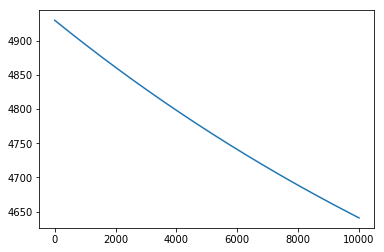

In [53]:
plt.plot(range(len(losses)), losses)
plt.show()

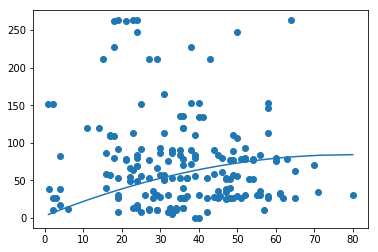

In [54]:
plt.scatter(age,fare)
plt.plot(age.sort_values(),func(age.sort_values(),k_hat,w_hat, b_hat))